In [156]:
import sys
from typing import List, Dict, Any, Union, Iterator, Literal

import sympy
from sympy import Expr, Point2D, Line2D, Basic, Equality
from sympy.plotting.plot import Plot
from sympy import Ellipse, Point, Line, S, Eq, latex, plot_implicit
from sympy import symbols, simplify, Rational, solve
from IPython.display import Latex

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

In [157]:
ellipse: Ellipse = Ellipse(center=Point2D(1, 2), hradius=3, vradius=2)
props: Dict[str, Any] = {
    'eccentricity': ellipse.eccentricity,
    'area': ellipse.area,
    'circumference': ellipse.circumference,
    'center': ellipse.center,
    'hradius': ellipse.hradius,
    'vradius': ellipse.vradius,
    'periapsis': ellipse.periapsis,
    'apoapsis': ellipse.apoapsis,
    'focus\_distance': ellipse.focus_distance,
    'foci': ellipse.foci
}
display(Latex("$" + r'\\'.join((f'{key} = {latex(props[key])}') for key in props) + "$"))

<IPython.core.display.Latex object>

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

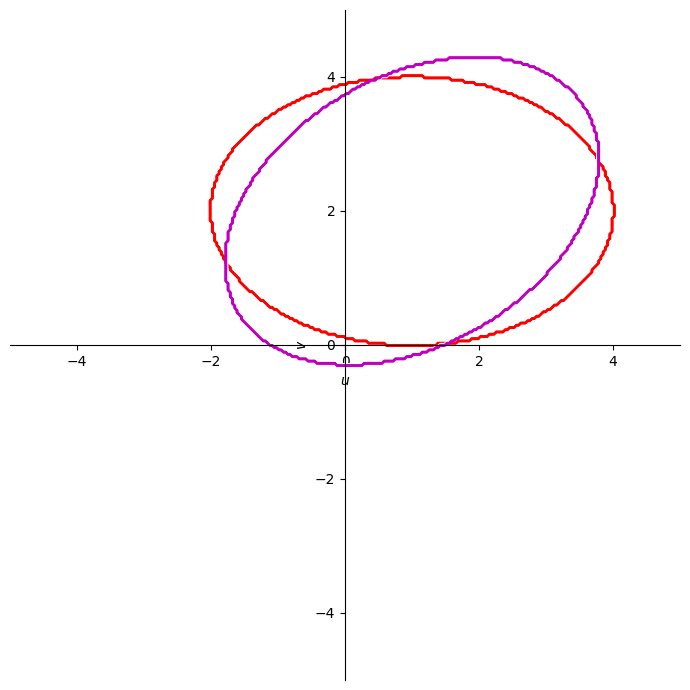

In [158]:
def degrees_to_rad(angle: Union[int, float, Basic]) -> Basic:
    return angle * sympy.pi / 180

eq: Expr = ellipse.equation(x='u', y='v')
tg_alpha = sympy.tan(degrees_to_rad(30))
eq_slope: Expr = ellipse.equation(x='u', y='v', _slope=tg_alpha)

p: Plot = plot_implicit(
    eq,
    line_color='r',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False,
    size=(7, 7)
)
p.extend(plot_implicit(
    eq_slope,
    line_color='m',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False
))
p.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

Указание: вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы. 

In [159]:
eq1: Expr = ellipse.equation()
symbs: Dict[str, Basic] = {str(s): s for s in eq1.free_symbols}
line: Line2D = Line2D(*ellipse.foci)
eq2: Expr = line.equation()
roots1: List[Dict[Expr, Expr]] = solve((eq1, eq2), list(symbs.values()))

eq3: Expr = line.perpendicular_line(ellipse.center).equation()
roots2: List[Dict[Expr, Expr]] = solve((eq1, eq3), list(symbs.values()))

points: List[Point2D] = [Point2D(x, y) for x, y in (roots1 + roots2)]
display(*points)

Point2D(-2, 2)

Point2D(4, 2)

Point2D(1, 0)

Point2D(1, 4)

### Задание 4*.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

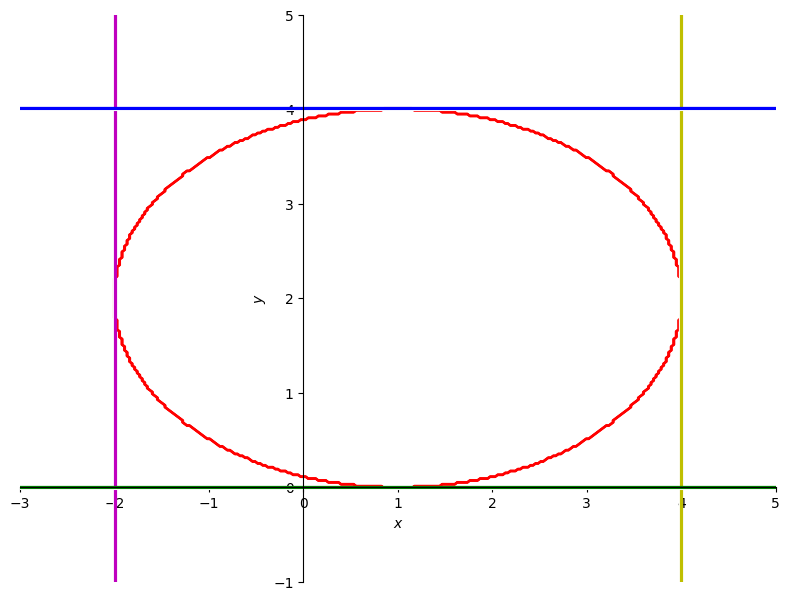

In [160]:
horiz_ellipse_axis: Line2D = Line2D(points[0], points[1])
vert_ellipse_axis: Line2D = Line2D(points[2], points[3])

colors_iterator: Iterator[Literal['m', 'y', 'g', 'b']] = iter(('m', 'y', 'g', 'b'))
eq: Expr = ellipse.equation(x='x', y='y')
p: Plot = plot_implicit(
    eq,
    (symbs['x'], -3, 5),
    (symbs['y'], -1, 5),
    line_color='r',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False,
    size=(8, 8)
)
equations: List[Expr] = \
    [vert_ellipse_axis.parallel_line(point).equation() for point in points[:2]] + \
    [horiz_ellipse_axis.parallel_line(point).equation() for point in points[2:]]
for equation in equations:
    p.extend(plot_implicit(
        equation,
        (symbs['x'], -3, 5),
        (symbs['y'], -1, 5),
        line_color=next(colors_iterator),
        aspect_ratio=(1, 1),
        show=False,
        adaptive=False,
    ))

p.show()

### Задание 5**.
Провести касательные к повернутому эллипсу из Задания 2 через его вершины.

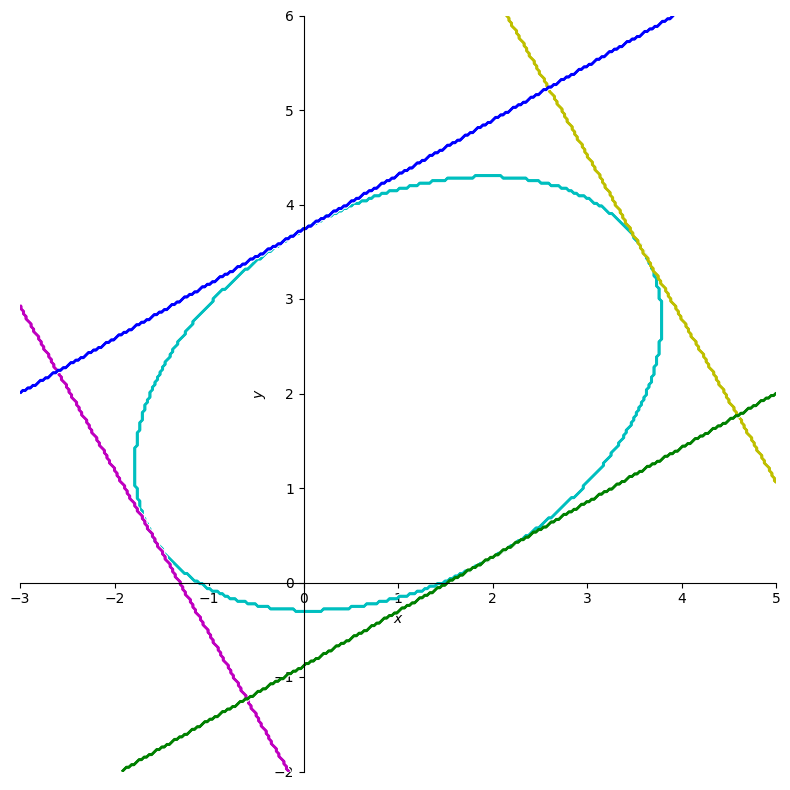

In [161]:
alpha: Basic = degrees_to_rad(30)
eq_slope: Expr = ellipse.equation(x='x', y='y', _slope=sympy.tan(alpha))
ellipse_center: Point2D = ellipse.center
symbs: Dict[str, Expr] = {str(s): s for s in eq_slope.free_symbols}

line: Line2D = Line(*ellipse.foci).rotate(alpha, ellipse_center)
eq2: Expr = line.equation()
roots1: List[Dict[Expr, Expr]] = solve((eq_slope, eq2), list(symbs.values()))

eq3: Expr = line.perpendicular_line(ellipse_center).equation()
roots2: List[Dict[Expr, Expr]] = solve((eq_slope, eq3), list(symbs.values()))

vertices: List[Point2D] = [Point2D(x, y) for x, y in (roots1 + roots2)]

p: Plot = plot_implicit(
    eq_slope,
    (symbs['x'], -3, 5),
    (symbs['y'], -2, 6),
    line_color='c',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False,
    size=(8, 8)
)

horiz_ellipse_axis: Line2D = Line2D(vertices[0], vertices[1])
vert_ellipse_axis: Line2D = Line2D(vertices[2], vertices[3])
equations: List[Expr] = \
    [vert_ellipse_axis.parallel_line(vertice).equation() for vertice in vertices[:2]] + \
    [horiz_ellipse_axis.parallel_line(vertice).equation() for vertice in vertices[2:]]
colors_iterator: Iterator[Literal['m', 'y', 'g', 'b']] = iter(('m', 'y', 'g', 'b'))
for eq_i in equations:
    p.extend(plot_implicit(
        eq_i,
        (symbs['x'], -3, 5),
        (symbs['y'], -2, 6),
        line_color=next(colors_iterator),
        aspect_ratio=(1, 1),
        show=False,
        adaptive=False,
    ))

p.show()

###  Индивидуальное задание
Эллипс с центром $A$, вертикальной полуосью $b$ и эксцентриситетом $\varepsilon$.
Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha$ градусов против часовой стрелки. 

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

Вариант N 50

Эллипс с центром $Point2D\left(3, -1\right)$, горизонтальной полуосью $33 \sqrt{57} / 19$, эксцентриситетом $8 / 11$.

Изобразить на графике эллипс, а также эллипс, повернутый на угол $ \alpha = $ $\pi / 6$ против часовой стрелки.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

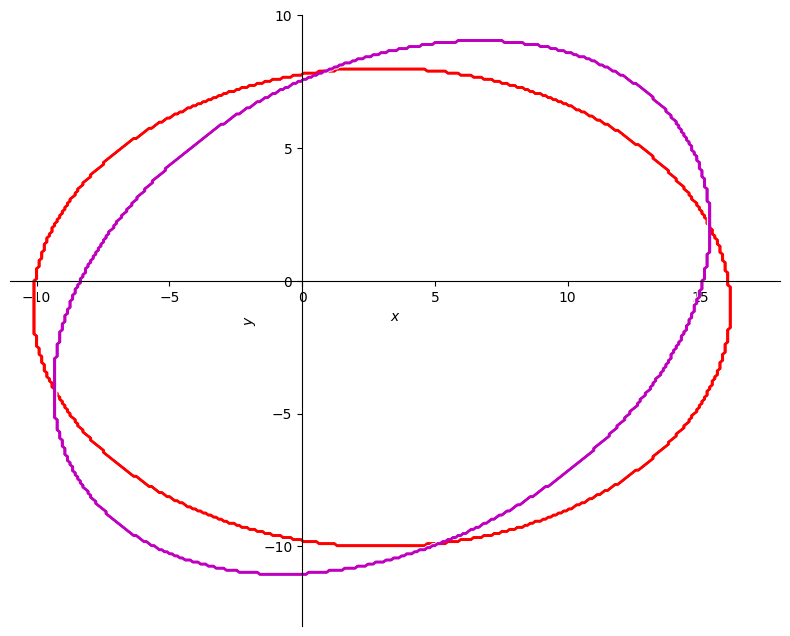

In [162]:
from typing import overload, Union, Optional

@overload
def print_sympy_entity(text: Optional[str] = None, raw: bool = True) -> None:
    ...

@overload
def print_sympy_entity(text: Optional[str] = None, expression: Optional[Union[str, Basic]] = None, raw: bool = True) -> None:
    ...

def print_sympy_entity(*args, **kwargs) -> None:
    text: Optional[str] = kwargs.get("text", None)
    expression: Optional[Union[str, Basic]] = kwargs.get("expression", None)

    if text is None and args:
        text = args[0]
    
    if expression is None and len(args) > 1:
        expression = args[1]

    if expression is None:
        if text is not None:
            display(Latex("$\\text{" + text + "}$"))
        return

    if kwargs.get("raw", True):
        expression = latex(expression)
    
    expression = '$' + str(expression) + '$'
    if text is not None:
        expression = "$\\text{" + text + "}$ " + expression

    display(Latex(expression))


A: Point2D = Point2D(3, -1)
b: Expr = 33*sympy.sqrt(57)/19
epsilon: Expr = S(8)/11
ellipse: Ellipse = Ellipse(center=A, hradius=b, eccentricity=epsilon)

ellipse_equation: Expr = ellipse.equation()
ellipse_eq: Equality = Eq(ellipse_equation + 1, 1)
symbs: Dict[str, Basic] = {str(s): s for s in ellipse_equation.free_symbols}
line: Line2D = Line2D(*ellipse.foci)
eq2: Expr = line.equation()
roots1: List[Dict[Expr, Expr]] = solve((ellipse_equation, eq2), list(symbs.values()))

eq3: Expr = line.perpendicular_line(ellipse.center).equation()
roots2: List[Dict[Expr, Expr]] = solve((ellipse_equation, eq3), list(symbs.values()))

vertices: List[Point2D] = [Point2D(x, y) for x, y in (roots1 + roots2)]

alpha: Expr = sympy.pi / 6
rotated_ellipse_eq: Expr = ellipse.equation(_slope=alpha)

print_sympy_entity("Центр эллипса:", A)
print_sympy_entity("Фокусы эллипса:", ' '.join(map(latex, ellipse.foci)), raw=False)
print_sympy_entity("Длины полуосей", r"\ ;\ ".join(map(latex, (ellipse.hradius, ellipse.vradius))), raw=False)
print_sympy_entity("Уравнение эллипса:", ellipse_eq)
print_sympy_entity("Вершины эллипса:", r"\ ;\ ".join(map(latex, vertices)), raw=False)

p: Plot = plot_implicit(
    ellipse_equation,
    (symbs['x'], -11, 18),
    (symbs['y'], -13, 10),
    line_color='r',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False,
    size=(8, 8)
)
p.extend(plot_implicit(
    rotated_ellipse_eq,
    (symbs['x'], -11, 18),
    (symbs['y'], -13, 10),
    line_color='m',
    aspect_ratio=(1, 1),
    show=False,
    adaptive=False,
))
p.show()